In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df_turistas_civitatis = pd.read_pickle(r'C:\Users\mituc\Ironhack\Curso\IronLabs\Proyecto-1\data\numero_turistas_fecha.pkl')

In [170]:
df_turistas_admon = pd.read_pickle(r'C:\Users\mituc\Ironhack\Curso\IronLabs\Proyecto-1\data\Barcelona_guiris_esquilados.pkl')

In [171]:
df_turistas_admon.reset_index(inplace=True)

In [172]:
df_turistas_admon.head(5)

,periodo,viajeros_espana,viajeros_extranjero,pernoctaciones_espana,pernoctaciones_extranjero,media_pernoc_esp,media_pernoc_ext,total_viajeros,total_pernoctaciones,media_total_pernoc
0,2022-01,107162,194312,203683,541541,1.9,2.8,301474,745224,2.5
1,2021-12,144299,250133,282398,674630,2.0,2.7,394432,957028,2.4
2,2021-11,120748,314677,228675,871021,1.9,2.8,435425,1099696,2.5
3,2021-10,130404,364349,270494,1013514,2.1,2.8,494753,1284008,2.6
4,2021-09,102053,309572,207329,856562,2.0,2.8,411625,1063891,2.6


In [173]:
df_turistas_admon.iloc[55,0]

'2017-06'

As civitatis started its activity for the tour that we are studying in June 2017, we'll select that period from the data frame we had generated using the data given by the goverment.

In [174]:
df_admon_select = df_turistas_admon.iloc[1:56]

In [175]:
d=df_admon_select.sort_values(by=['periodo'])

In [176]:
d.head(5)

,periodo,viajeros_espana,viajeros_extranjero,pernoctaciones_espana,pernoctaciones_extranjero,media_pernoc_esp,media_pernoc_ext,total_viajeros,total_pernoctaciones,media_total_pernoc
55,2017-06,128405,584798,248830,1584983,1.9,2.7,713203,1833813,2.6
54,2017-07,137560,634306,261185,1803145,1.9,2.8,771866,2064330,2.7
53,2017-08,92632,601050,194356,1807172,2.1,3.0,693682,2001528,2.9
52,2017-09,116521,568131,216184,1550853,1.9,2.7,684652,1767037,2.6
51,2017-10,125400,531660,238121,1434376,1.9,2.7,657060,1672497,2.5


In [177]:
d=df_admon_select.set_index('periodo')

In [178]:
d.head(1)

,viajeros_espana,viajeros_extranjero,pernoctaciones_espana,pernoctaciones_extranjero,media_pernoc_esp,media_pernoc_ext,total_viajeros,total_pernoctaciones,media_total_pernoc
periodo,,,,,,,,,
2021-12,144299,250133,282398,674630,2.0,2.7,394432,957028,2.4


In [179]:
d=d.drop(['viajeros_espana', 'viajeros_extranjero',	'pernoctaciones_espana', 'pernoctaciones_extranjero',	'media_pernoc_esp', 'media_pernoc_ext', 'total_pernoctaciones',	'media_total_pernoc'],axis=1)

In [204]:
d.head(5)

,periodo,total_viajeros
0,2021-12,394432
1,2021-11,435425
2,2021-10,494753
3,2021-09,411625
4,2021-08,442028


In [203]:
d.reset_index(inplace=True)

In [206]:
d = d.sort_values(by=['periodo'])

[None]

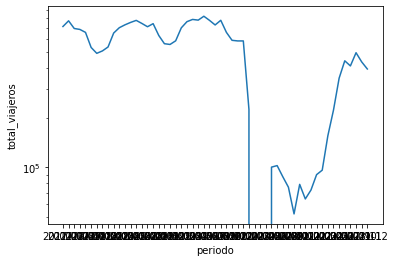

In [208]:
fig1 = sns.lineplot(data=d, x='periodo', y='total_viajeros')
fig1.set(yscale='log')

<AxesSubplot:xlabel='periodo'>

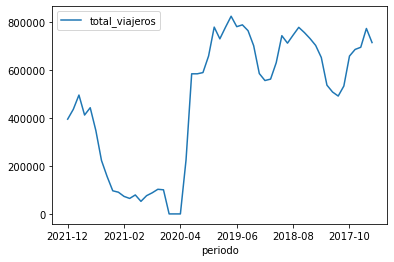

In [180]:
d.plot()

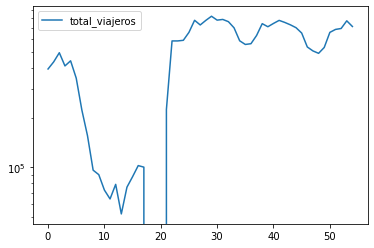

In [218]:
d.plot()
plt.yscale('log')

In [182]:
d.tail(5)

,total_viajeros
periodo,
2017-10,657060
2017-09,684652
2017-08,693682
2017-07,771866
2017-06,713203


In [183]:
len(d['total_viajeros'])

55

In [184]:
df_turistas_civitatis.head(5)

numero_turistas
fecha fecha                 
2017  6                   19
      7                   26
      8                   82
      9                   58
      10                  34

In [217]:
df_turistas_civitatis.reset_index(level='fecha')

ValueError: The name fecha occurs multiple times, use a level number

In [212]:
oi=df_turistas_civitatis.merge(d, how='left', left_on='numero_turistas', right_on='total_viajeros')

In [213]:
oi.tail(5)

,numero_turistas,periodo,total_viajeros
51,553,NaN,<NA>
52,678,NaN,<NA>
53,386,NaN,<NA>
54,470,NaN,<NA>
55,203,NaN,<NA>


In [185]:
df_turistas_civitatis.iloc[52,0]

678

In [186]:
len(df_turistas_civitatis['numero_turistas'])

56

<AxesSubplot:xlabel='fecha,fecha'>

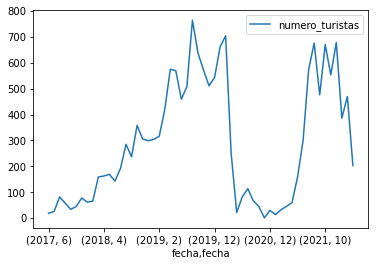

In [187]:
df_turistas_civitatis.plot()

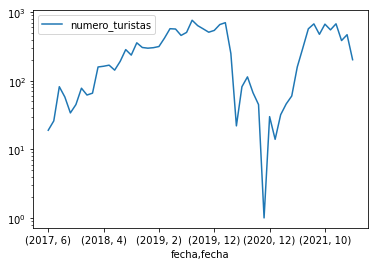

In [188]:
df_turistas_civitatis.plot()
plt.yscale('log')